# Coseg exeperiment

Due to size limitation, we only include the super pixels version (which is in the supplemantry), also, we only display 1 frame, as the translation from super pixels to pixel is memory heavy (3MB per frame).

In [2]:
using Images
using Distributed
using NPZ

#### Data Loading and preprocessing

In [3]:
data = Dict()
for i=1:50
    group_data = copy(npzread("DATA/coseg/frame" * string(i) * ".npy")')
    group_data[1:3,:] ./= 25
    group_data[4:5,:] ./= 250
    data[i] = group_data
end

pixels_to_super1 = npzread("DATA/coseg/pixels_to_super1.npy")
pixels_to_super2 = npzread("DATA/coseg/pixels_to_super2.npy")
pixels_to_super3 = npzread("DATA/coseg/pixels_to_super3.npy")

436×1024 Array{Int64,2}:
   0    0    0    0    0    0    0    0  …   32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0      32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0      32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0      32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0      32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0  …   32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0      32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0      32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0      32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0      32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0  …   32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0      32   32   32   32   32   32   32
   0    0    0    0    0    0    0    0

In [4]:
using Distributed
addprocs(4)
@everywhere using VersatileHDPMixtureModels

┌ Info: Precompiling VersatileHDPMixtureModels [cb401d7d-c4f9-4284-af24-a1eca280e8e8]
└ @ Base loading.jl:1273


CompositeException: On worker 2:
ArgumentError: Package VersatileHDPMixtureModels [cb401d7d-c4f9-4284-af24-a1eca280e8e8] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.

_require at ./loading.jl:993
require at ./loading.jl:922
#1 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Distributed/src/Distributed.jl:78
#105 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Distributed/src/process_messages.jl:290
run_work_thunk at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Distributed/src/process_messages.jl:79
run_work_thunk at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Distributed/src/process_messages.jl:88
#98 at ./task.jl:333

...and 3 more exception(s).


In [10]:
global_hyper_params = niw_hyperparams(1.0,
    [47.56,45.40,27.82] ./ 25,
    9.0,
    [[0.8662817 0.78323282 0.41225376];
        [0.78323282 0.74170384 0.50340258];
        [0.41225376 0.50340258 0.79185577]]*1.0)

local_hyper_params = niw_hyperparams(1.0,
    [217.857,511.084] ./ 250,
    5.0,
    Matrix{Float64}(I, 2, 2)*0.2)

niw_hyperparams(1.0, [0.871428, 2.044336], 5.0, [0.2 0.0; 0.0 0.2])

In [11]:
hdp, history = vhdp_fit(data,3,10.0,100.0,10.0,global_hyper_params,local_hyper_params,150)
color_means = [(x.cluster_params.cluster_params.distribution.μ*25)/255 for x in hdp.global_clusters]
glabels = create_global_labels(hdp.groups_dict[1])
img = zeros(size(pixels_to_super1,1),size(pixels_to_super1,2),3)
for i=1:size(pixels_to_super1,1)
    for j=1:size(pixels_to_super1,2)
        img[i,j,:] = color_means[glabels[(pixels_to_super1)[i,j]+1]]
    end
end
image1 = img[:,:,[3,2,1]]
image1 = permutedims(image1,[3,1,2])
glabels = create_global_labels(hdp.groups_dict[2])
img = zeros(size(pixels_to_super2,1),size(pixels_to_super2,2),3)
for i=1:size(pixels_to_super2,1)
    for j=1:size(pixels_to_super2,2)
        img[i,j,:] = color_means[glabels[(pixels_to_super2)[i,j]+1]]
    end
end
image2 = img[:,:,[3,2,1]]
image2 = permutedims(image2,[3,1,2])

glabels = create_global_labels(hdp.groups_dict[3])
img = zeros(size(pixels_to_super3,1),size(pixels_to_super3,2),3)
for i=1:size(pixels_to_super3,1)
    for j=1:size(pixels_to_super3,2)
        img[i,j,:] = color_means[glabels[(pixels_to_super3)[i,j]+1]]
    end
end
image3 = img[:,:,[3,2,1]]
image3 = permutedims(image3,[3,1,2])


Iteration: 1|| Global Counts: [50]|| iter time: 0.10778093338012695
Iteration: 2|| Global Counts: [50]|| iter time: 0.08347201347351074
Iteration: 3|| Global Counts: [50]|| iter time: 0.0806269645690918
Iteration: 4|| Global Counts: [50]|| iter time: 0.0867609977722168
Iteration: 5|| Global Counts: [51, 51]|| iter time: 0.07793903350830078
Iteration: 6|| Global Counts: [51, 69]|| iter time: 0.2078390121459961
Iteration: 7|| Global Counts: [53, 77]|| iter time: 0.12623095512390137
Iteration: 8|| Global Counts: [54, 84]|| iter time: 0.11515498161315918
Iteration: 9|| Global Counts: [54, 88]|| iter time: 0.14554595947265625
Iteration: 10|| Global Counts: [55, 94, 55]|| iter time: 0.2730891704559326
Iteration: 11|| Global Counts: [64, 97, 59]|| iter time: 0.1690070629119873
Iteration: 12|| Global Counts: [67, 104, 63]|| iter time: 0.27566003799438477
Iteration: 13|| Global Counts: [71, 104, 71]|| iter time: 0.15233278274536133
Iteration: 14|| Global Counts: [71, 99, 81]|| iter time: 0.2169

3×436×1024 Array{Float64,3}:
[:, :, 1] =
 0.129543  0.129543  0.129543  0.129543  …  0.129543  0.129543  0.129543
 0.243669  0.243669  0.243669  0.243669     0.243669  0.243669  0.243669
 0.261817  0.261817  0.261817  0.261817     0.261817  0.261817  0.261817

[:, :, 2] =
 0.129543  0.129543  0.129543  0.129543  …  0.129543  0.129543  0.129543
 0.243669  0.243669  0.243669  0.243669     0.243669  0.243669  0.243669
 0.261817  0.261817  0.261817  0.261817     0.261817  0.261817  0.261817

[:, :, 3] =
 0.129543  0.129543  0.129543  0.129543  …  0.129543  0.129543  0.129543
 0.243669  0.243669  0.243669  0.243669     0.243669  0.243669  0.243669
 0.261817  0.261817  0.261817  0.261817     0.261817  0.261817  0.261817

...

[:, :, 1022] =
 0.0701149  0.0701149  0.0701149  …  0.0872286  0.0872286  0.0872286
 0.17794    0.17794    0.17794       0.153544   0.153544   0.153544 
 0.197234   0.197234   0.197234      0.161628   0.161628   0.161628 

[:, :, 1023] =
 0.0701149  0.0701149  0.0701149

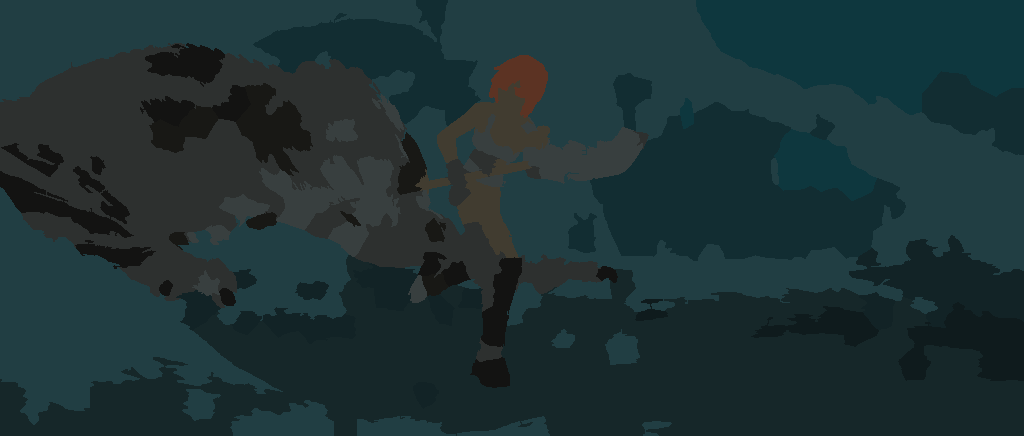

In [12]:
colorview(RGB,image1)

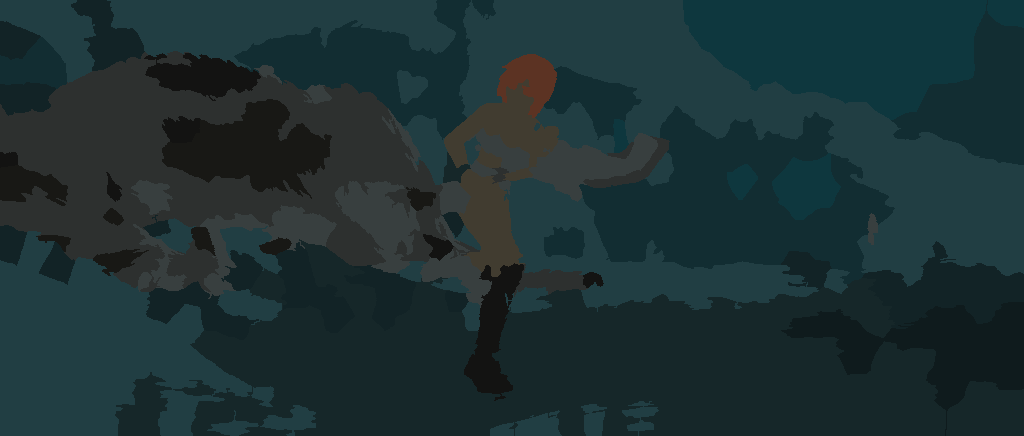

In [13]:
colorview(RGB,image2)

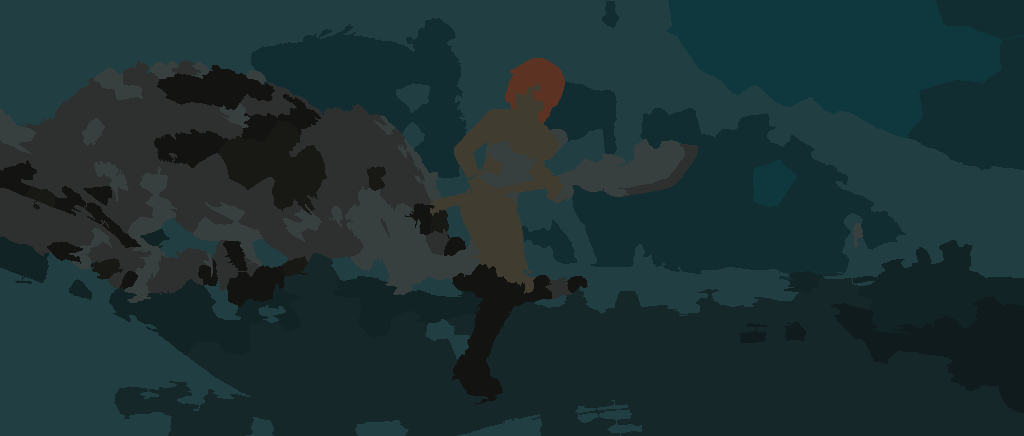

In [14]:
colorview(RGB,image3)